# Problem set 1 Coding Part CS585 #
# Minh Nguyen #

## Problem 3 Un-shredding Image ##

### 3.1 ###

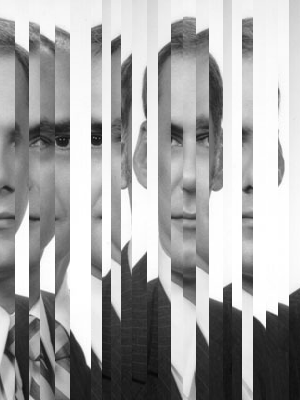

In [1]:
from PIL import Image
import os, glob
import numpy as np
from IPython.display import display

def load_images_from_folder(folder):
    # first step is to get the list of all the files in the folder
    image_filenames = glob.glob(os.path.join(folder, '*.png'))
    # Now you should load each image into memory as a 
    # numpy array 
    images = []
    # ADD CODE HERE
    image_filenames.remove('shredded-image\\simple_larry-roberts.png')
    for file in image_filenames:
        images.append(np.array(Image.open(file)))
    return images

images = load_images_from_folder('shredded-image')
simple_combined = Image.fromarray(np.hstack(images), 'RGB')
display(simple_combined)

### 3.2 ###

In [2]:
# We'll begin by computing similarities between all image pairs
similarities = np.zeros((len(images), len(images)))
for i, ith_image in enumerate(images):
  for j, jth_image in enumerate(images):
    # Now we'll compute similarity by taking the right-most
    # column of the ith image, and the left-most column of the
    # jth image
    # ADD CODE HERE
    
    similarities[i, j] = np.sum((ith_image[:, ith_image.shape[1]-1].astype(np.int64) - jth_image[:,0].astype(np.int64))**2)
    #similarities[i,j] = 0

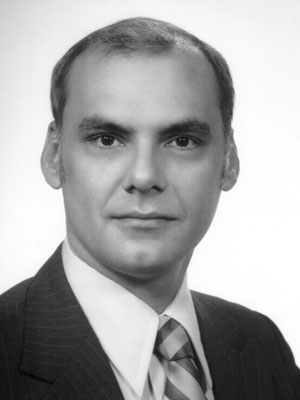

In [3]:
def greedy_merge(strips, compatibility):
    # ok, we want to merge images in order of compatibility
    # so we can begin by flattening the compatibility
    # array and then using argsort to get the index
    # of the most compatibile strips

    ## ADD CODE HERE
    ordering = np.argsort(np.reshape(compatibility, -1))
    
    # Now that we have our ordering, we need to keep track of
    # strips so we only select them once.  Let's keep track of 
    # them in the "used_strips" variable
    used_strips = set()

    # OK, now we should iterate through our ordering and add
    # the most compatible strips until we have a single image
    merged_strips = [] # final image
    merged_left = None # left-most merged strip index
    merged_right = None # right-most merged strip index

    # we'll keep this going until all strips are used
    
    while len(used_strips) != len(strips):
    # we should always add at least one strip, so let's make sure
        num_used_start = len(used_strips)
        
        for next_item in ordering:
            # first we get its row and column index
            left_strip = next_item // len(strips) #get i
            right_strip = next_item % len(strips) #get j
            # skip if they're the same strip
            if left_strip == right_strip:
                continue

            # base case, no merged strips yet
            if merged_left is None:
                merged_strips = np.hstack((strips[left_strip], strips[right_strip])) 
                merged_right = right_strip
                merged_left = left_strip
                used_strips.add(right_strip) 
                used_strips.add(left_strip) 
                continue

            # Check if you can add this to the left of merged_strips and merge it if
            # so. If you merge, you should update merged_left, used_strips,
            # then break out of the loop.
            
            if left_strip not in used_strips:
              # ADD CODE HERE
                if right_strip == merged_left:
                    merged_strips = np.hstack(( strips[left_strip],merged_strips)) 
                    merged_left = left_strip
                    used_strips.add(left_strip) 
                    break

            # Check if you can add this to the left of merged_strips and merge it if
            # so. If you merge, you should update merged_right, used_strips,
            # then break out of the loop.
            if right_strip not in used_strips:
              # ADD CODE HERE
                if left_strip == merged_left:
                    merged_strips = np.hstack((merged_strips, strips[right_strip])) 
                    used_strips.add(right_strip)
                    merged_right = right_strip
                    break
           
        assert num_used_start != len(used_strips)
    return merged_strips

ssd_images = greedy_merge(images, similarities)
ssd_combined = Image.fromarray(ssd_images, 'RGB')
display(ssd_combined)

### 3.3 ###

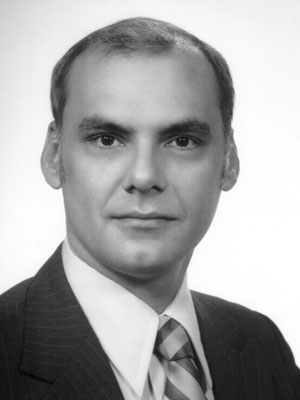

In [4]:
# We'll begin by computing similarities between all image pairs
similarities = np.zeros((len(images), len(images)))
for i, ith_image in enumerate(images):
  for j, jth_image in enumerate(images):
    # Now we'll compute similarity by taking the right-most
    # column of the ith image, and the left-most column of the
    # jth image
    # ADD CODE HERE
    
    similarities[i, j] = np.sum((ith_image[:, ith_image.shape[1]-1].astype(np.int64) - jth_image[:,0].astype(np.int64))**2)
    #similarities[i,j] = 0
def greedy_merge(strips, compatibility):
    # ok, we want to merge images in order of compatibility
    # so we can begin by flattening the compatibility
    # array and then using argsort to get the index
    # of the most compatibile strips

    ## ADD CODE HERE
    ordering = np.argsort(np.reshape(compatibility, -1))
    
    # Now that we have our ordering, we need to keep track of
    # strips so we only select them once.  Let's keep track of 
    # them in the "used_strips" variable
    used_strips = set()

    # OK, now we should iterate through our ordering and add
    # the most compatible strips until we have a single image
    merged_strips = [] # final image
    merged_left = None # left-most merged strip index
    merged_right = None # right-most merged strip index

    # we'll keep this going until all strips are used
    
    while len(used_strips) != len(strips):
    # we should always add at least one strip, so let's make sure
        num_used_start = len(used_strips)
        
        for next_item in ordering:
            # first we get its row and column index
            left_strip = next_item // len(strips) #get i
            right_strip = next_item % len(strips) #get j
            # skip if they're the same strip
            if left_strip == right_strip:
                continue

            # base case, no merged strips yet
            if merged_left is None:
                merged_strips = np.hstack((strips[left_strip], strips[right_strip])) 
                merged_right = right_strip
                merged_left = left_strip
                used_strips.add(right_strip) 
                used_strips.add(left_strip) 
                continue

            # Check if you can add this to the left of merged_strips and merge it if
            # so. If you merge, you should update merged_left, used_strips,
            # then break out of the loop.
            
            if left_strip not in used_strips:
              # ADD CODE HERE
                if right_strip == merged_left:
                    merged_strips = np.hstack(( strips[left_strip],merged_strips)) 
                    merged_left = left_strip
                    used_strips.add(left_strip) 
                    break

            # Check if you can add this to the left of merged_strips and merge it if
            # so. If you merge, you should update merged_right, used_strips,
            # then break out of the loop.
            if right_strip not in used_strips:
              # ADD CODE HERE
                if left_strip == merged_left:
                    merged_strips = np.hstack((merged_strips, strips[right_strip])) 
                    used_strips.add(right_strip)
                    merged_right = right_strip
                    break
           
        assert num_used_start != len(used_strips)
    return merged_strips

ssd_images = greedy_merge(images, similarities)
ssd_combined = Image.fromarray(ssd_images, 'RGB')
display(ssd_combined)